In [1]:
import cv2
import os

imageNamesList = os.listdir('rsl-alphabet-dataset-master')                     

letterDict = {                                                                 
    'a': ('а'),                                                                
    'b': ('б'),
    'v': ('в'),
    'g': ('г'),
    'e': ('е'),
    'zh': ('ж'),
    'i': ('и'),
    'k': ('к'),
    'l': ('л'),
    'm': ('м'),
    'n': ('н'),
    'o': ('о'),
    'p': ('п'),
    'r': ('р'),
    's': ('с'),
    't': ('т'),
    'u': ('у'),
    'f': ('ф'),
    'kh': ('х'),
    'c': ('ц'),
    'ch': ('ч'),
    'sh': ('ш'),
    'yi': ('ы'),
    'ye': ('э'),
    'yu': ('ю'),
    'ya': ('я'),
}
letterList = list (letterDict)                                                 

imageList = []                                                                 
answerList = []                                                                

for imageName in imageNamesList:                                               
                                                                               
    image = cv2.imread ('rsl-alphabet-dataset-master/' + imageName)            
    image = cv2.resize (image, (100, 100))                                     
    image = cv2.cvtColor (image, cv2.COLOR_RGB2GRAY)                           
    imageList.append (image)                                                   
    answerList.append (letterList.index (imageName.split ('_') [1]))           
                                                                               
import numpy as np
imageList = np.array (imageList)                                               
answerList = np.array (answerList)                                            

                                            


FileNotFoundError: [WinError 3] Системе не удается найти указанный путь: 'rsl-alphabet-dataset-master'

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: ylabel='count'>

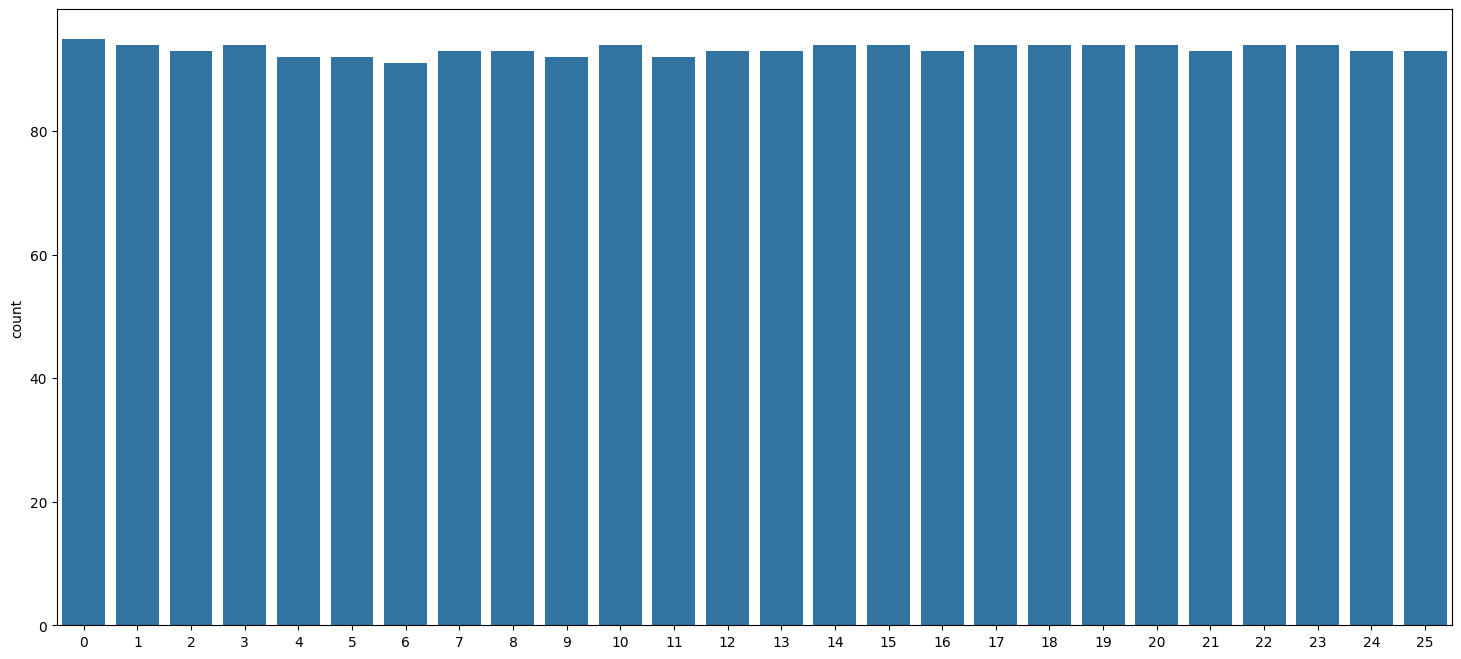

In [3]:
plt.figure(figsize = (18,8))
sns.countplot(x = answerList)

In [4]:
from sklearn.preprocessing import LabelBinarizer

answerList_binarize = LabelBinarizer()
answerList = answerList_binarize.fit_transform(answerList) 

In [5]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(imageList, answerList, test_size = 0.2, random_state=12345)

In [6]:
x_train = x_train.reshape(x_train.shape[0], 100, 100, 1)
x_test = x_test.reshape(x_test.shape[0], 100, 100, 1) 

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout

batch_size = 64
num_classes = 26
epochs = 25

In [8]:
x_train = x_train.astype ('float32') / 255
x_test = x_test.astype ('float32') / 255 

In [9]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam


model = Sequential()
model.add(Conv2D(64, kernel_size=(3,3), activation = 'relu', input_shape=(100, 100, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(64, kernel_size=(3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.20))

model.add(Dense(num_classes, activation = 'softmax'))

In [10]:
model.compile(loss = 'categorical_crossentropy',
               optimizer = Adam(),
               metrics=['accuracy'])

In [11]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=epochs, batch_size=batch_size)

Epoch 1/25


31/31 [==============================] - 12s 335ms/step - loss: 3.2619 - accuracy: 0.0433 - val_loss: 3.2524 - val_accuracy: 0.0412
Epoch 2/25
31/31 [==============================] - 12s 385ms/step - loss: 3.1681 - accuracy: 0.1057 - val_loss: 2.9580 - val_accuracy: 0.1526
Epoch 3/25
31/31 [==============================] - 12s 387ms/step - loss: 2.5628 - accuracy: 0.2660 - val_loss: 2.2950 - val_accuracy: 0.3567
Epoch 4/25
31/31 [==============================] - 11s 356ms/step - loss: 1.8207 - accuracy: 0.4577 - val_loss: 1.7754 - val_accuracy: 0.4907
Epoch 5/25
31/31 [==============================] - 11s 359ms/step - loss: 1.2223 - accuracy: 0.6397 - val_loss: 1.3697 - val_accuracy: 0.6412
Epoch 6/25
31/31 [==============================] - 11s 371ms/step - loss: 0.7890 - accuracy: 0.7732 - val_loss: 1.1088 - val_accuracy: 0.7278
Epoch 7/25
31/31 [==============================] - 12s 396ms/step - loss: 0.4901 - accuracy: 0.8490 - val_loss: 0.9839 - val_accuracy: 0.76

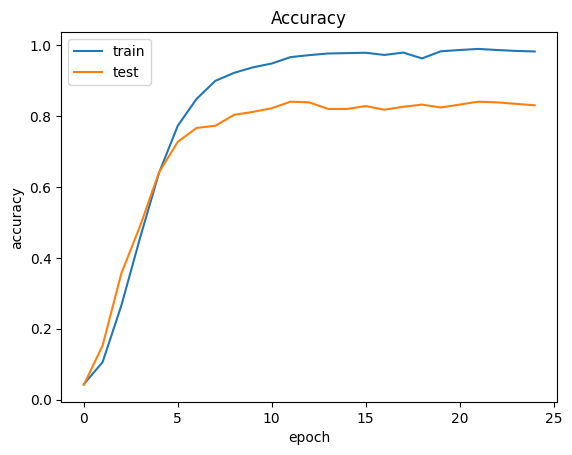

In [12]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Accuracy")
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'])

plt.show()

In [13]:

y_pred = model.predict(x_test)

16/16 [==============================] - 1s 43ms/step


In [14]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred.round())

0.822680412371134

In [15]:
def getletter(result):
    classLabels = {0: 'А',
                   1: 'Б',
                   2: 'В',
                   3: 'Г',
                   4: 'Е',
                   5: 'Ж',
                   6: 'И',
                   7: 'К',
                   8: 'Л',
                   9: 'М',
                   10: 'Н',
                   11: 'О',
                   12: 'П',
                   13: 'Р',
                   14: 'С',
                   15: 'Т',
                   16: 'У',
                   17: 'Ф',
                   18: 'Х',
                   19: 'Ц',
                   20: 'Ч',
                   21: 'Ш',
                   22: 'Ы',
                   23: 'Э',
                   24: 'Ю',
                   25: 'Я'}
    try:
        res = result.argmax ()
        return classLabels[res]
    except:
        return "Error"

In [17]:
letterLabels = ['А', 'Б', 'В', 'Г', 'Е', 'Ж', 'И', 'К', 'Л', 'М', 'Н', 'О', 'П', 'Р', 'С', 'Т', 'У', 'Ф', 'Х', 'Ц', 'Ч', 'Ш', 'Ы', 'Э', 'Ю', 'Я']

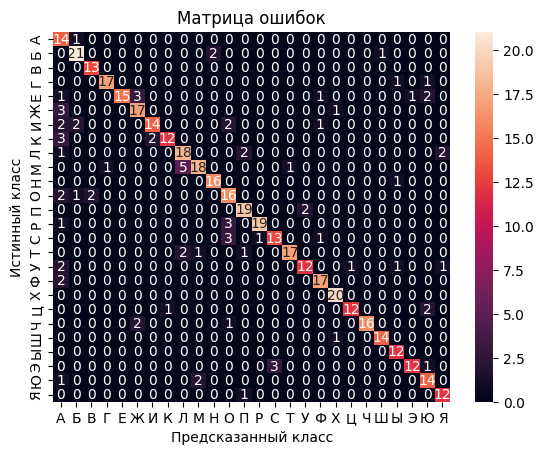

In [18]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

plot = sns.heatmap (confusion_matrix (np.array ([getletter (i) for i in y_test]), np.array ([getletter (i) for i in y_pred.round ()])),
                    xticklabels = letterLabels, yticklabels = letterLabels, annot = True)
plt.title ('Матрица ошибок')
plt.xlabel ('Предсказанный класс')
plt.ylabel ('Истинный класс')
plt.show (plot)

In [ ]:
cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()



    roi = frame[100:400, 320:620]
    cv2.imshow('roi', roi)
    roi = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
    roi = cv2.resize(roi, (100,100), interpolation = cv2.INTER_AREA)

    cv2.imshow('roi scaled and gray', roi)
    copy = frame.copy()
    cv2.rectangle(copy, (320, 100), (620, 400), (255, 0, 0), 5)


    roi = roi.reshape(1, 100, 100, 1)

    result = model.predict (roi, 1, verbose = 0)[0]
    
    cv2.putText(copy, getletter(result), (300, 100), cv2.FONT_HERSHEY_COMPLEX, 2, (0, 255, 0), 2)
    cv2.imshow ('result', copy)

    if cv2.waitKey(1) == 13:
        break

cap.release()
cv2.destroyAllWindows()